In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
stud_math = pd.read_csv('stud_math.csv')

stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
str_arr = np.array(['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup'
                   ,'famsup','paid','activities','nursery','higher','internet','romantic'])
pd.set_option('display.max_columns', None)# все столбцы
pd.set_option('display.max_rows', None)
stud_math


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Вспомогательные функции для работы с данными

In [3]:
# ФУНКЦИИ
"""
Проверяет на есть ли пустые значения или NaN, если есть то Заменяет их None..
"""
def checking_str(element):
    if element == None:
        return None
    if  (str(element) == 'nan' or str(element) == 'NaN' or str(element) == ''):
        return None 
    else:
        return element
    
    
"""
В значение(выброс) заполняет NaN
Устанавливает верхнюю границу и нижнию границу использую подход IQR 
и всё что не входит в эти границы перезаполняет nan
Для работы функциии нужна библиотека import numpy as np
"""
def outlier_in_nan(columns,percent_1,percent_2):
    for i in [columns]:
            q75,q25 =  np.percentile(stud_math.loc[:,i].dropna(),[percent_1,percent_2])

            max=q75+(1.5*(q75-q25))
            min=q25-(1.5*(q75-q25))

            stud_math.loc[stud_math[i] < min,i] = np.nan
            stud_math.loc[stud_math[i] > max,i] = np.nan
    return 0

### Предварительная подготовка данных.

Применяем функцию <b>checking_str</b> для заменны некоректных данных в ячейках типа object  на None
<br>Удаляем колонку <b>'studytime, granular'</b> 

In [5]:
for i in str_arr:
    stud_math[i] = stud_math[i].apply(lambda x: checking_str(x))
    
stud_math = stud_math.drop(columns =['studytime, granular'], axis = 1)


KeyError: "['studytime, granular'] not found in axis"

In [6]:
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<AxesSubplot:>

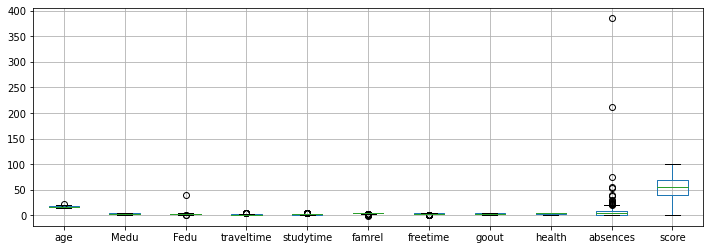

In [7]:
plt.subplots(figsize = (12, 4))
bloxplot = stud_math.boxplot(column=['age','Medu','Fedu','traveltime','studytime','famrel',
                                     'freetime','goout','health','absences','score'],fontsize=10)
bloxplot

Из выше представленного графика видно что существуют выбросы. 
<br>Уберём выбросы из колонок <b>Febu</b> и <b>adsencs</b><br>
1. В столбце<b> Febu </b> содержиться информация об образовании отца измеряемая 4-х бальной системой, а из<br> графика явно видно что был не корректный ввод данных
2. В столбце<b> adsencs </b> содержиться информация об количество пропущенных занятий , из графика видно<br> есть часть данных об учениках которые вообще не ходил  на учёбу.<br><br>
В остальных столбцах тоже есть выбросы но они соответсвуют условию.<br>
Для устранения выбросов применим функцию <b> outlier_in_nan </b>

<AxesSubplot:>

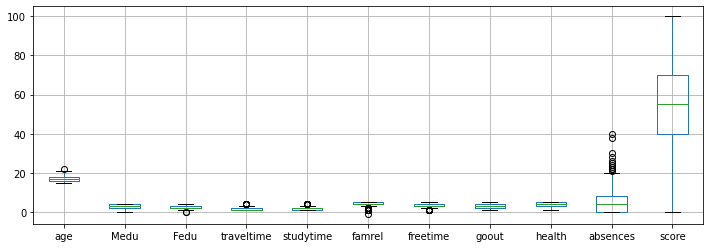

In [7]:
outlier_in_nan('absences',95,5)
outlier_in_nan('Fedu',90,10)

plt.subplots(figsize = (12, 4))
bloxplot = stud_math.boxplot(column=['age','Medu','Fedu','traveltime','studytime','famrel',
                                     'freetime','goout','health','absences','score'],fontsize=10)
bloxplot

## Анализ Данных

### Цель:
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Рекомендации:
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

#### Оценим каково распределения учеников по школам согласнооиих возраста и пола

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


<AxesSubplot:xlabel='school,sex,age'>

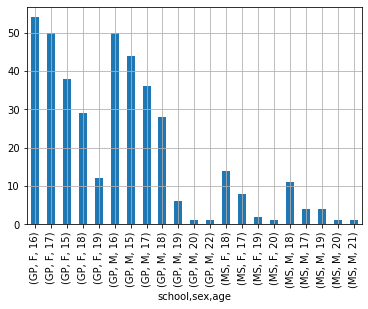

In [8]:
print(stud_math['age'].value_counts())
stud_math.groupby(by = ['school', 'sex'])['age'].value_counts().plot(kind = 'bar', grid= True) 

Основываясь на данных графика можно заключить, что большенство учеников учаться в школе GP и их возраст в подовляющей части от 15 до 19 лет . Также видно, что ученики учащиеся в школе MS имеют возраст от 17 до 22 года 

In [9]:
# средний балл за экзамн
stud_math['score'].mean() 

52.26221079691517

## Средний балл за экзамен  52

## Анализ влияния социальных факторов на результат экзамена по математике.

### Приоритет выбора школы
Отсортируем данные по школе <b>School</b> и причине выбора школы <b>reason</b> и применим  функцию <b>value_counts()</b> для получения количества уникальные значений.<br> 
- <b>home</b> - близость к дому 
- <b>reputation</b> - репутация школы, 
- <b>course</b> - образовательная программа, 
- <b>other</b> - другое

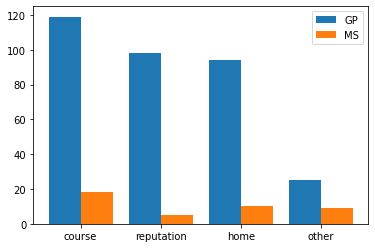

In [10]:
reason = stud_math.groupby(by = ['school'])['reason'].agg(['value_counts']).reset_index()
# display(reason)

GP=reason[reason['school']=='GP']
MS=reason[reason['school']=='MS']

fig, axes = plt.subplots()

axes.bar(GP['reason'],GP['value_counts'],width = -0.4, align = 'edge',label = 'GP')
axes.bar(MS['reason'],MS['value_counts'],width = 0.4,align = 'edge',label = 'MS')
axes.legend(loc = 1)

Из графика видно что для учащихся:
- GP - Главным было <b>Образовательная программа</b> , на втором <b>репутация</b> и а на третьем <b>близость к дому</b>
- MS - Главным было <b>Образовательная программа</b> , на втором  <b>близость к дому</b> на третьем <b>другое</b>


#### Адрес проживания учащихся

In [11]:
stud_math.groupby(by = ['school'])['address'].agg(['value_counts']).reset_index()

,school,address,value_counts
0,GP,U,277
1,GP,R,60
2,MS,R,23
3,MS,U,18


Из таблицы можно предположить что школа GP большая и находиться в городе так как большинство учеников проживающих в городе ходят в эту школу  и и большая асть проживающих тоже выбирают эту школу. MS школа небольшого размера и находиться за городом для учеников живущих в не города

### Проверка зависимости оценказа экзамен от школы

<AxesSubplot:xlabel='school,sex'>

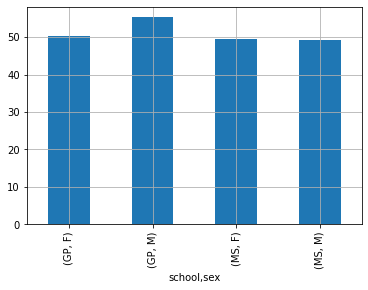

In [12]:
stud_math.groupby(by = ['school', 'sex'])['score'].mean().plot(kind = 'bar', grid= True) 

Из графика видно что есть зависимость среднего балла за экзамен учащихся от школы. Также из данных можно предположить что мальчики GP школы сдают экзамены лучше.

### Адрес ученика "address"

<AxesSubplot:title={'center':'Адрес ученика относительно среднего бала за экзамен'}, xlabel='address,school'>

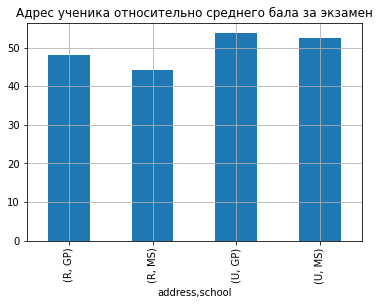

In [13]:
stud_math.groupby(by=['address','school'])['score'].mean().plot(kind = 'bar', grid= True,title='Адрес ученика относительно среднего бала за экзамен')

### Количествоо членов семьи "famsize"

- LE3 - Меньше или равно 3-х человек в семье
- GT3 - Больше или равно 3-х человек в семье

<AxesSubplot:title={'center':'Размер семьи относительно среднего бала за экзамен'}, xlabel='famsize,school'>

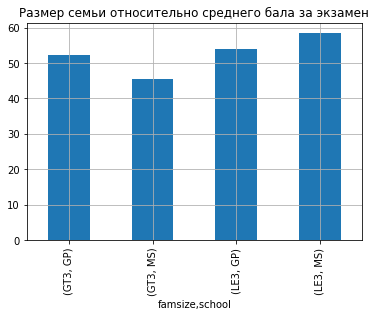

In [14]:
stud_math.groupby(by = ['famsize','school'])['score'].mean().plot(kind = 'bar', grid= True,title='Размер семьи относительно среднего бала за экзамен') 

Из данного графика можно судить о том что средний бал у учеников где в семье более 3 человек ниже чем в семьях где один ребёнок. Так как в больщих семьях возможность уделить время одному человеку меньше что может повлиять на результат успеваемости. Следовательноо оставляем эти данные. <b>famsize</b>

### Статус совместного жилья родителей "Pstatus"
Проверим влияюет ли тот факт, когда родители живут в месте или раздельно 

344


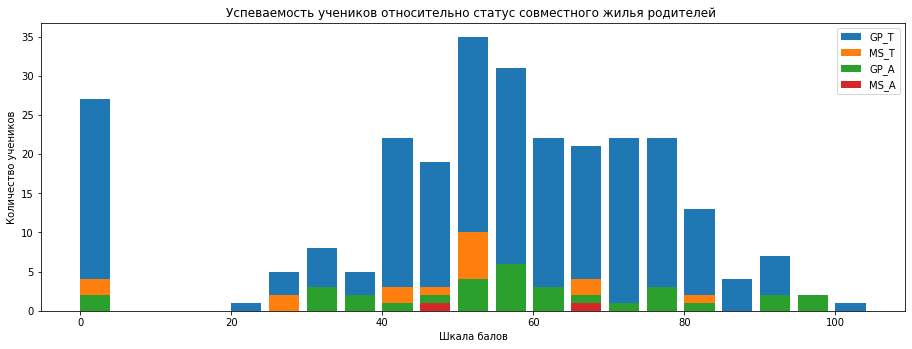

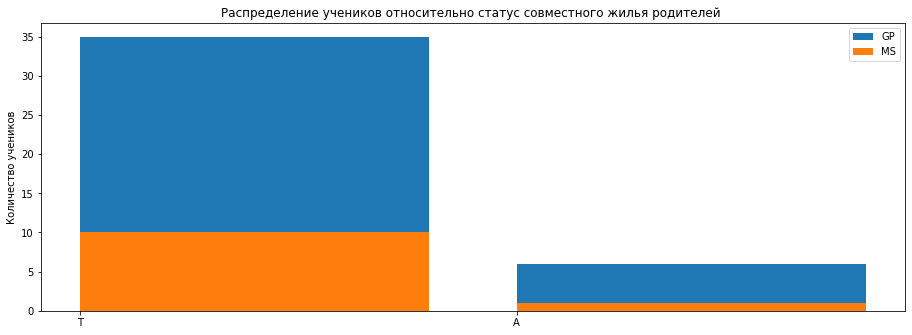

In [16]:
reason = stud_math.groupby(by = ['school','score'])['Pstatus'].agg(['value_counts']).reset_index()
# display(reason)
print(reason['value_counts'].sum())
GP=reason[reason['school']=='GP']
MS=reason[reason['school']=='MS']

GPT=reason[(reason['school']=='GP')&(reason['Pstatus']=='T')]
MST=reason[(reason['school']=='MS')&(reason['Pstatus']=='T')]
GPA=reason[(reason['school']=='GP')&(reason['Pstatus']=='A')]
MSA=reason[(reason['school']=='MS')&(reason['Pstatus']=='A')]


# График количества учеников родители (проживания 'T' - живут вместе 'A' - раздельно) и балов за экзамен
fig, axes = plt.subplots()
axes =fig.add_axes([0, 0, 2, 1])

axes.set_title('Успеваемость учеников относительно статус совместного жилья родителей ')
plt.xlabel("Шкала балов")
plt.ylabel("Количество учеников")

axes.bar(GPT['score'],GPT['value_counts'],width = 4, align = 'edge',label = 'GP_T')
axes.bar(MST['score'],MST['value_counts'],width = 4,align = 'edge',label = 'MS_T')
axes.bar(GPA['score'],GPA['value_counts'],width = 4,align = 'edge',label = 'GP_A')
axes.bar(MSA['score'],MSA['value_counts'],width = 4,align = 'edge',label = 'MS_A')
axes.legend(loc = 1)

# График количества учеников  родители (проживания 'T' - живут вместе 'A' - раздельно)
fig, axes = plt.subplots()
axes =fig.add_axes([0, 0, 2, 1])

axes.set_title('Распределение учеников относительно статус совместного жилья родителей ')
plt.ylabel("Количество учеников")

axes.bar(GP['Pstatus'],GP['value_counts'], align = 'edge',label = 'GP')
axes.bar(MS['Pstatus'],MS['value_counts'], align = 'edge',label = 'MS')

axes.legend(loc = 1)

Согласно двум графиком можно сказать что разница в успеваемости в зависимости от проживания родителей, совместно или раздельно приктически не имеет значения. Следовательное эти данные можно не учитывать.

### Занятость родителей

Посмотрим как влияет рабочая занятость родителей на успеваемость учеников

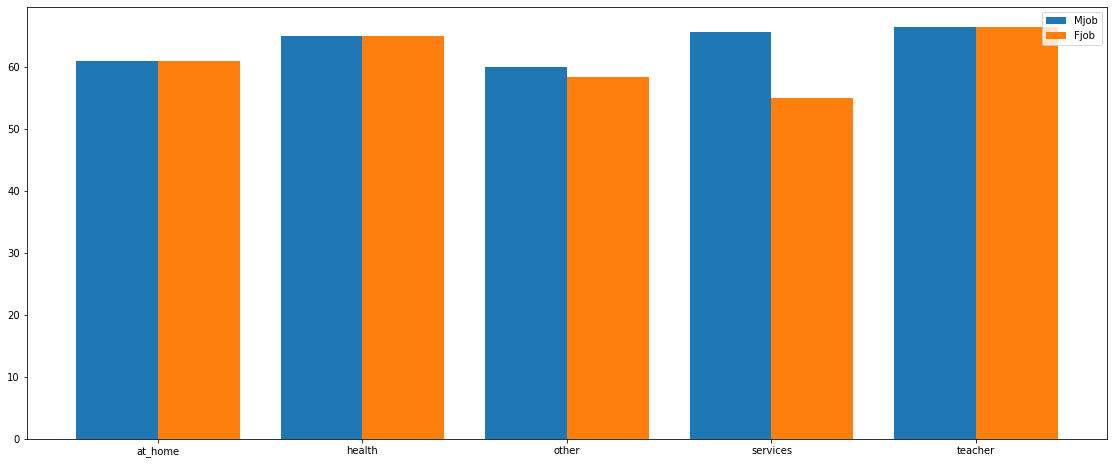

In [17]:
Parents = stud_math.groupby(by = ['Mjob','Fjob'])['score'].agg(['mean']).reset_index()
# display(Parents)

fig, axes = plt.subplots()

axes =fig.add_axes([0, 0, 2.5, 1.5])

axes.bar(Parents['Mjob'],Parents['mean'],width = -0.4, align = 'edge',label = 'Mjob')
axes.bar(Parents['Fjob'],Parents['mean'],width = 0.4,align = 'edge',label = 'Fjob')
axes.legend(loc = 1)


Из данных представленных на графике можно предположит, что показатели у уеников родителе по професси "Учитель" а худшие показатели у учеников отец которых заняты на гос. службе 

### Дополнительная образовательная поддержка "schoolsup"

<AxesSubplot:title={'center':'Доп. образовательная поддержка относительно среднего бала за экзамен'}, xlabel='schoolsup,school'>

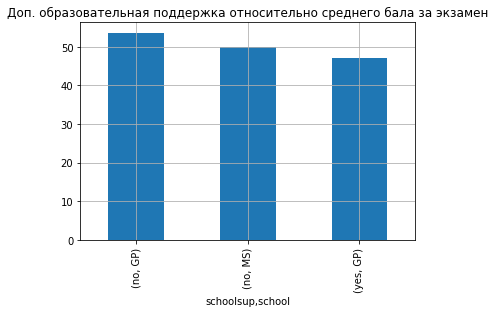

In [18]:
stud_math.groupby(by = ['schoolsup','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Доп. образовательная поддержка относительно среднего бала за экзамен')

Из ходя из графика можно предположить , что уеники которые берут дополнительные занятия, средний бал ниже среднего. Включаем эти данные <b>schoolsup</b>

### Семейная образовательная поддержка"famsup"

<AxesSubplot:title={'center':'семейная образовательная поддержка относительно среднего бала за экзамен'}, xlabel='famsup,school'>

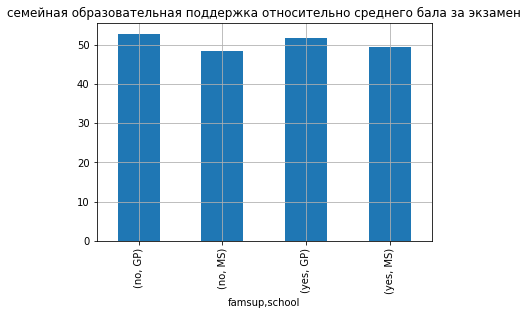

In [19]:
stud_math.groupby(by = ['famsup','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='семейная образовательная поддержка относительно среднего бала за экзамен')

Из графика видно что особого влияние Семейная образовательная поддержка на оценку по экзамену не влияет. Так как разница между теми у кого она есть и учеников у которых нет , показатели в пактически не отличаются. Эти данные учитывать не будем.

### Дополнительные платные занятия по математике "paid"

<AxesSubplot:title={'center':'Дополнительные платные занятия по математике относительно среднего бала за экзамен'}, xlabel='paid,school'>

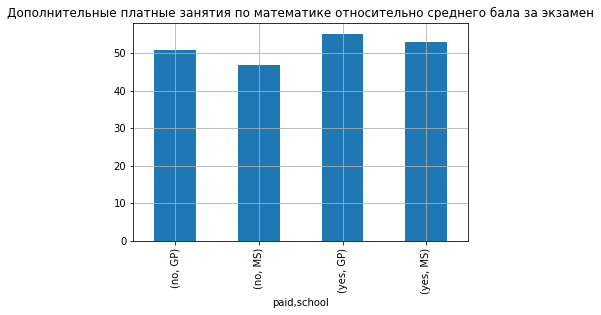

In [20]:
stud_math.groupby(by = ['paid','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Дополнительные платные занятия по математике относительно среднего бала за экзамен')

Из графика видно, что у учащиеся школы MS  без дополнительных занятий по математик бал за экзамен ниже среднего. Следовательно количество дополнительных занятий по математике влияет на результат. Данные <b>paid</b> будем учитывать.  

### Дополнительные внеучебные занятия "activities"

<AxesSubplot:title={'center':'Дополнительные внеучебные занятия по математике относительно среднего бала за экзамен'}, xlabel='activities,school'>

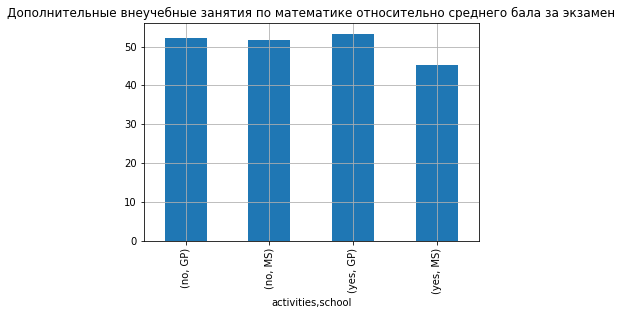

In [21]:
stud_math.groupby(by = ['activities','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Дополнительные внеучебные занятия по математике относительно среднего бала за экзамен')

Из графика можно предположить что ученики школы MS которые посещают внеучебные занятия , бал за экзамен ниже среднего. Следствие это может быть тот факт что учешиеся заняты большим количеством занятий и больше устают. Будем учитывать эти данные <b>activities</b> 

### Посещал детский сад "nursery"

<AxesSubplot:title={'center':'Результат по экзамену относительно посещали ученики детский сад yes/no'}, xlabel='nursery,school'>

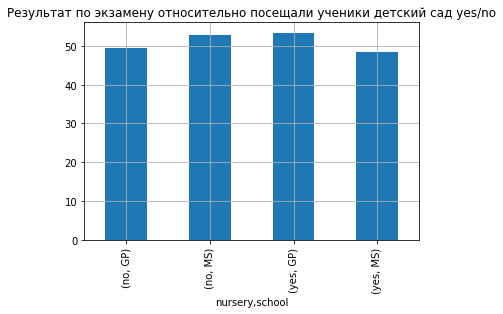

In [22]:
stud_math.groupby(by = ['nursery','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену относительно посещали ученики детский сад yes/no')

Из графика видно что данные имеют разные показатели без явной связи между собой. Видно что учащиеся школы GP, которые посещяли детский сад,
сдают экзамены лучше чем те которые не посещяли, но у учящихся школы MS показатели полностью противоположные. Для более точной оценки нужо больше информации более детальное иследование чтобы дать определённое заключение , следовательно не будем учитывать эти данные.

### Хочет получить высшее образование "higher"

<AxesSubplot:title={'center':'Результат по экзамену относительно Хочет получить высшее образование yes/no'}, xlabel='higher,school'>

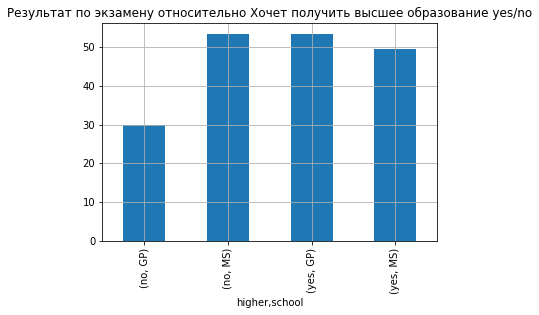

In [23]:
stud_math.groupby(by = ['higher','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену относительно Хочет получить высшее образование yes/no')

Из графика нельзя предположить влияет ли желания получить высшее образования на боллы за экзамен. Так как учащиеся школы GP не желающие получить высшее образования имеют низкий бал , но учащиеся школы MS не желающие получить высшее образования имеют бал  практически на уровне с учащимися желающие получить высщее образования. Следовательно не будем учитывать эти данны так как этот вопрос требует более подробного анализа.

### Наличие интернета дома "internet"

<AxesSubplot:title={'center':'Результат по экзамену относительно Наличие интернета дома yes/no'}, xlabel='internet,school'>

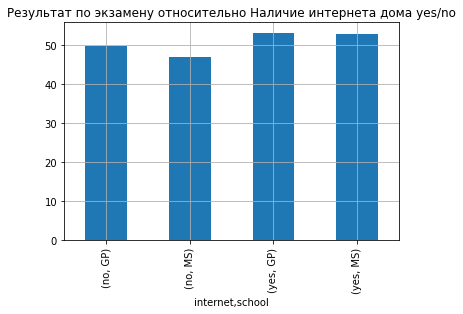

In [24]:
stud_math.groupby(by = ['internet','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену относительно Наличие интернета дома yes/no')

Из графика можно предположить что учащиеся не имеющие интернета дома получают бал за экзамен ниже среднего. Этому может послужить та причина что возможность использовать информационные ресурсы помагают в обучении. Будем учитывать эти данные <b>internet</b>

###  В романтических отношениях "romantic"

<AxesSubplot:title={'center':'Результат по экзамену относительно Наличие интернета дома yes/no'}, xlabel='romantic,school'>

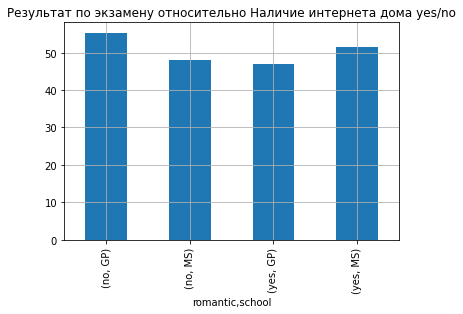

In [25]:
stud_math.groupby(by = ['romantic','school'])['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену относительно Наличие интернета дома yes/no')

Из графика нельзя с точность опеделить можно ли вылияют ли романтические отношения на экзамент по математике. Эти данные учитывать не будем.

### Вывод:
Проанализировав столбцы пришли к выводу что будем применять данные для выявления студентов находящихся в зоне риска.
- <b>school</b> - Существует различия между обучением в школах в школе MS средний бал ниже
- <b>address</b> - У учеников живущих за городом баллы за экзамен ниже
- <b>famsize</b> - У учеников в школы MS где в семье больше одного ребёнка бал за экзамен ниже остальных, будем учитывать это показатель
- <b>Fjob </b> - У учащихся отец которых занят гос. службе бал за экзамен ниже, , будем учитывать это
- <b>schoolsup</b> - Дополнительная оброзовательная поддержка влияет нигативно на результат экзаменов
- <b>paid</b> - У кого нет возможности посещять дополнительные платные занятия по математики получают меньше баллов за экзамен
- <b>internet</b> - У учащихся которых есть возможность пользоваться информационным ресурсом показатели за экзамен выше.

## Кореляционный анализ колличественных переменных

<AxesSubplot:>

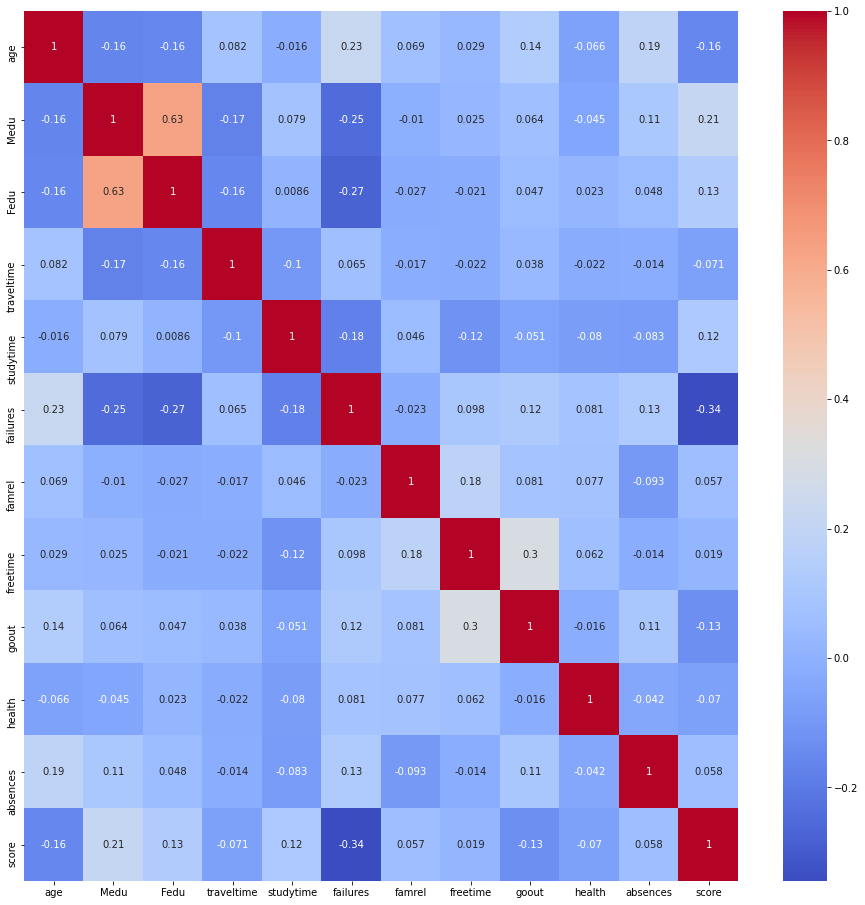

In [26]:
correlation = stud_math.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками. Будем брать все те значения которые имеют связь болше 10% т.е. всу те которые боьше 0.1<br>
Возьмём столбцы (age,Medu,Fedu,studytime,failures,goout) 

### Результат по экзамену относительно возрастной группы "age"

<AxesSubplot:title={'center':'Результат по экзамену по возрастной группе'}, xlabel='age'>

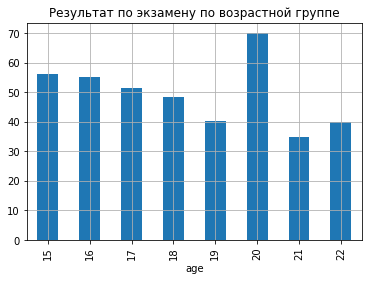

In [27]:
stud_math.groupby(by="age")['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену по возрастной группе')

Из графика можно предположить что учащиеся в возрасте 18-19 и 21-22 получают балл ниже среднего.

### Результат по экзамену относительно образования родителей "Medu" и "Fedu"
- 0 - нет
- 1 - 4 класса
- 2 - 5-9 классы
- 3 - среднее специальное или 11 классов
- 4 - высшее

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,None,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,None,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,None,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


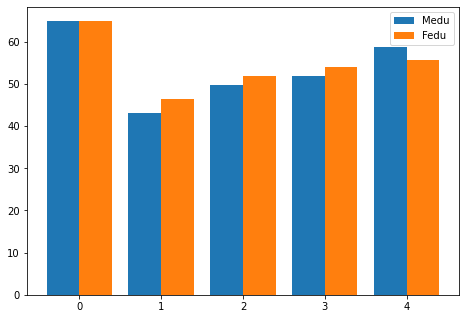

In [57]:
education_medu = stud_math.groupby(by = ['Medu'])['score'].agg(['mean']).reset_index()
education_fedu = stud_math.groupby(by = ['Fedu'])['score'].agg(['mean']).reset_index()


fig, axes = plt.subplots()
axes =fig.add_axes([0, 0, 1, 1])

# axes.set_title('Распределение учеников относительно статус совместного жилья родителей ')
# plt.ylabel("Количество учеников")

axes.bar(education_medu['Medu'],education_medu['mean'],width = -0.4, align = 'edge',label = 'Medu')
axes.bar(education_fedu['Fedu'],education_fedu['mean'], width = 0.4, align = 'edge',label = 'Fedu')
axes.legend(loc = 1)

# 0 - нет образования. 
stud_math[stud_math['Fedu']==0]# 0 - нет образования.

Из графика видно что средний бал учеников имеет зависимость от образования их родителей.Чем ниже уровень образования родителей тем ниже средний бал учеников. Будем учитывать тех учников у которых образование родителей с пометкой (1 - 4 класса) Так же есть показатель (0- нет образования) из таблицы видно что есть только двое учащихся с даной пометкой, следовательно можно предположить что они просто не предоставили данные об образовании родителей, следовательное не будем учитыват данные с отметкой 0.

### Результат экзамена относительно потраченого время на учёбу помимо школы "studytime"
- 1 - <2 часов
- 2 - 2-5 часов
- 3 - 5-10 часов
- 4 - >10 часов

<AxesSubplot:title={'center':'Результат по экзамену относительно  времени на учёбу помимо школы '}, xlabel='studytime'>

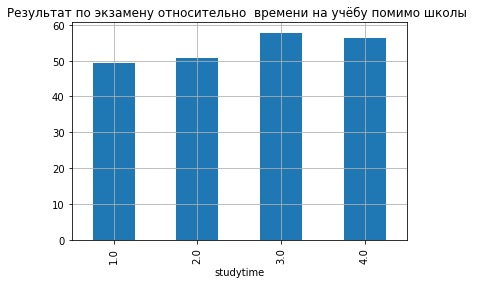

In [15]:
stud_math.groupby(by="studytime")['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат по экзамену относительно  времени на учёбу помимо школы ')

Из графика можно предположить что в группу риска попадают те ученики которые не тратят время на учёбу помимо школы или тратят меньше двух часов. Будем учитывать те данные у которых будет отметка 1 - меньше 2-х часов на занятия.

### Результат экзамена относительно количество внеучебных неудач "failures"
- 0 - нет
- 1 - есть одна
- 2 - есть две
- 3 - есть три или больше

<AxesSubplot:title={'center':'Результат экзамена относительно количество внеучебных неудач '}, xlabel='failures'>

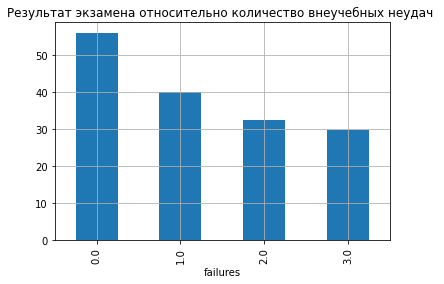

In [16]:
stud_math.groupby(by="failures")['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат экзамена относительно количество внеучебных неудач ')

Из графика видно что есть явная закономерность от количества внеучебных неудач. Учащиеся которые имеютт хотябы одну внеучебную неудачу уже получают бал ниже среднего. Будем учитывать данне которые имеют отметку не 0

### Результат экзамена относительно проведённого времени с друзьями "goout"
от 1 - очень мало до 5 - очень много

<AxesSubplot:title={'center':'Результат экзамена относительно проведённого времени с друзьями'}, xlabel='goout'>

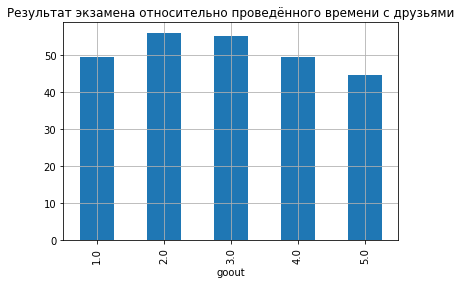

In [19]:
stud_math.groupby(by="goout")['score'].mean().plot(kind = 'bar', grid= True,
                                                                  title='Результат экзамена относительно проведённого времени с друзьями')

Из зграфика видно что время проведённое с друзьями по большей части положительно сказываеться на результат экзамена, за исключением тех учащихся которые уделяют время для общения с лрузья ми под отметкой 5 - очень много, следовательно будем учитывать данные с этой отметкой

### Вывод:
Проанализировав столбцы пришли к выводу что будем применять данные для выявления студентов находящихся в зоне риска.
- <b>age</b> - У учащихся  в возрасте 18-19 и 21-22 получают балл ниже среднего. 
- <b>Medu,Fedu</b> - У учащихся которых родители имеют образование  4 класса  
- <b>studytime</b> - Учащиеся которыее проводят меньше 2-х часов времени за занятиями в неучебное время  
- <b>failures</b> - У тех учащихся у которых существуют внеучебные неудачи результаты хуже  
- <b>goout</b> - Учащиеся которые проводят мгного времени с друзьями показатели за экзамен ниже 

## Общий вывод после анализа данных:
Для выявления учеников находящихся в группе риска будем использовать данные столбцов<br> <b>school, address, famsize, Fjob, schoolsup, paid, internet, age, Medu, Fedu, studytime, failures, goout</b>
<br>У каждого столбца будем учитывать определённый показатель:

- <b>school</b> - Существует различия между обучением в школах в школе MS средний бал ниже <b>(MS)</b>
- <b>address</b> - У учеников живущих за городом баллы за экзамен ниже <b>(R)</b>
- <b>famsize</b> - У учеников в школы MS где в семье больше одного ребёнка бал за экзамен ниже остальных, будем учитывать это показатель <b>(GT3)</b>
- <b>Fjob </b> - У учащихся отец которых занят гос. службе бал за экзамен ниже, будем учитывать это <b>(services)</b>
- <b>schoolsup</b> - Дополнительная оброзовательная поддержка влияет нигативно на результат экзаменов <b>(yes)</b>
- <b>paid</b> - У кого нет возможности посещять дополнительные платные занятия по математики получают меньше баллов за экзамен <b>(no)</b>
- <b>Internet</b> - У учащихся которых есть возможность пользоваться информационным ресурсом показатели за экзамен выше. <b>(no)</b>
- <b>age</b> - У учащихся  в возрасте 18-19 и 21-22 получают балл ниже среднего. <b>(18-19 и 21-22)</b>
- <b>Medu,Fedu</b> - У учащихся которых родители имеют образование  4 класса  <b>(1)</b>
- <b>studytime</b> - Учащиеся которыее проводят меньше 2-х часов времени за занятиями в неучебное время  <b>(1)</b>
- <b>failures</b> - У тех учащихся у которых существуют внеучебные неудачи результаты хуже  <b>(1,2,3)</b>
- <b>goout</b> - Учащиеся которые проводят мгного времени с друзьями показатели за экзамен ниже <b>(5)</b>

In [21]:
conda install -c conda-forge jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\proto\anaconda3

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    jupyter_contrib_core-0.3.3 |             py_2          15 KB  conda-forge
    jupyter_contrib_nbextensions-0.5.1|     pyhd8ed1ab_2        19.5 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|py38haa244fe_1002          15 KB  conda-forge
    jupyter_latex_envs-1.4.6   |  pyhd8ed1ab_1002         735 KB  conda-forge
    jupyter_nbextensions_configurator-0.4.1|   py38haa244fe_2         491 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                          